In [2]:
import edoxrd as xrd
import peakutils as pk
import edoxrd as xrd
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed
import numpy as np
from scipy.signal import savgol_filter
import peakutils as pk

%matplotlib inline

In [3]:
sample = 'e18015'
# d = '"C:\Users\zatterin\OneDrive - University College London\OneDrive Synced Docs\phd\data\XRD\"\\' + sample + '"\DteX"'
d = '/users/zatterin/Documents/data/XRD/2018/{0}/'.format(sample)

In [19]:
files = !ls {d} | grep '.ras' #| grep '_00[1-9]' | grep '.ras'
for index, fname in enumerate(files): print('{0}...{1}'.format(index,fname))

0...e18015_001_t2t.ras
1...e18015_002_t2t.ras
2...e18015_011_phi.ras
3...e18015_KTO_002_rc.ras
4...e18015_PTO_002_rc.ras
5...e18015_refl_pre.ras
6...e18015_refl.ras


In [100]:
tt, i = xrd.read_data(d+files[1])
# y = 4 * np.pi * np.sin(np.deg2rad(tt/2)) / 1.5406

Text(0,0.5,'$\\ln(I)$')

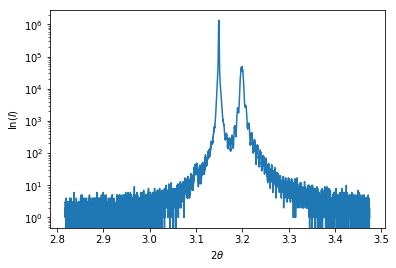

In [89]:
plt.plot(y, i)
plt.yscale('log')
plt.xlabel(r'$2\theta$')
plt.ylabel(r'$\ln(I)$')
# plt.xlim(44,48)

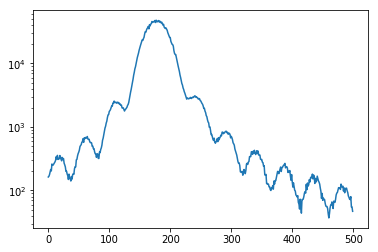

In [102]:
plt.plot(i[2700:3200])
plt.yscale('log')

In [103]:
tt, i = tt[2700:3300],i[2700:3300]

TypeError: read_data() got an unexpected keyword argument 'comments'

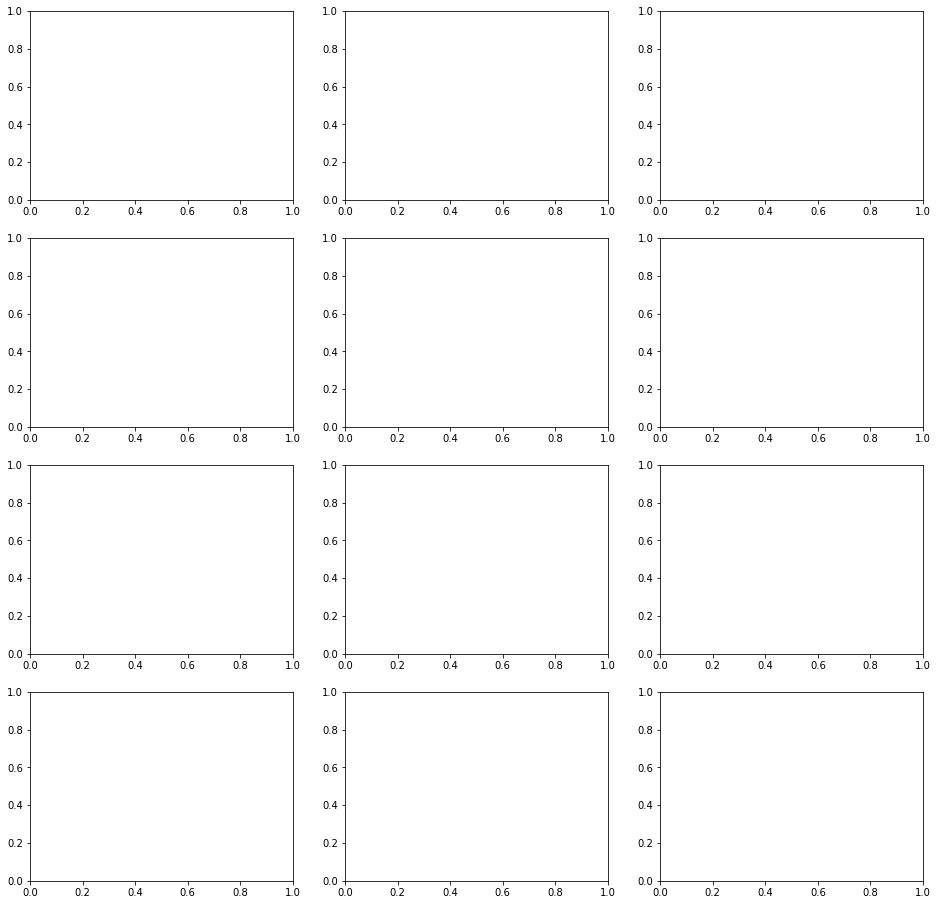

In [13]:
fig, ax = plt.subplots(4,3, figsize=(16,16))
ax = ax.flatten()
for i in range(3):
    ax[i].plot(*xrd.read_data(files[i],d, comments='#'),label=files[i]) 
    ax[i].set_xlabel(r'$2\theta$')
    ax[i].set_ylabel(r'$I$')
    ax[i].set_yscale('log')
    ax[i].legend(fontsize=9)

## Simulations

#### Estimate out-of-plane lattice parameter 

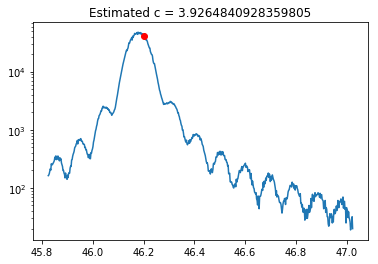

In [23]:
xdata, ydata = tt,i#xrd.read_data(d+files[1])
idxs = pk.indexes(ydata, thres=1e-6, min_dist=10)
film_peak = ydata[idxs].argsort()[::-1][1]
plt.plot(xdata,ydata)
plt.plot(xdata[idxs][film_peak],ydata[idxs][film_peak],'o',c='red'); plt.yscale('log')
c = 1/((2/1.5406) * np.sin(np.deg2rad(xdata[idxs][film_peak]/2)))
c = c*2
plt.title('Estimated c = {0}'.format(c)) # change multiplier depending on order of reflection!
plt.show()

#### Estimate thickness from Laue oscillations:

In [98]:
tt[idx]

array([45.425, 46.043, 46.177, 46.305])

(0, 0.06)

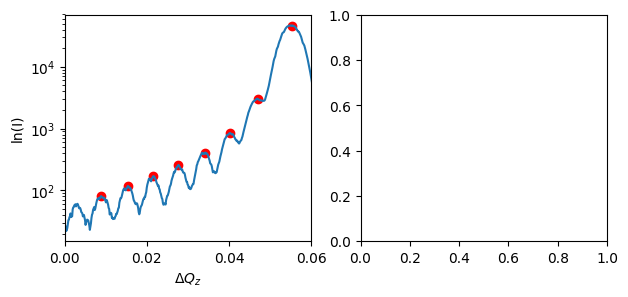

In [106]:
ismooth = savgol_filter(i, 3, 0)
idx = pk.indexes(ismooth, thres=1e-3, min_dist=30)

order = np.array(range(len(idx)))
q = 4 * np.pi * np.sin(np.deg2rad(tt[idx]/2)) / 0.15406 
m,b = np.polyfit(order,q,1)
period = abs(2 * np.pi / m)

fig, ax = plt.subplots(1,2,figsize=(7,3),dpi=100)
# fig.suptitle('Thickness: {0} nm'.format(np.round(period, decimals=2)))

y = 4 * np.pi * np.sin(np.deg2rad(tt/2)) / 1.5406

ax[0].plot(abs(y-y.max()),ismooth)
ax[0].scatter(abs(y-y.max())[idx], ismooth[idx], c='r')
ax[0].set_yscale('log')
ax[0].set_xlabel(r'$\Delta Q_z$')
ax[0].set_ylabel(r'ln(I)')
ax[0].set_xlim(0,0.06)

# ax[1].plot(order, order*m+b, label='$q_m = {0:.3f}m + {1:.3f}$'.format(m, b))
# ax[1].scatter(order, q,c='r')
# ax[1].legend()
# ax[1].set_xlabel('Peak order')
# ax[1].set_ylabel('Peak position')


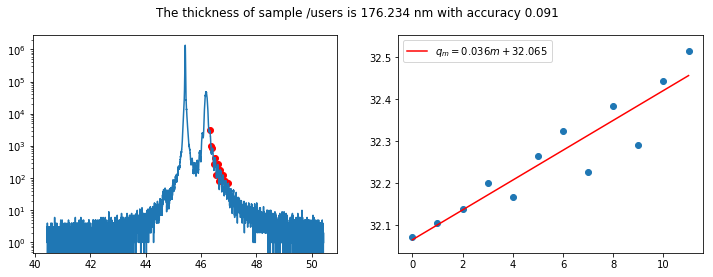

In [10]:
# t = xrd.calc_thickness(d+files[1], threshold=1e-5, distance=20, side='r')

#### Simulate starting from previous results:

In [11]:
dset = files[1]

In [12]:
@interact(sub='KTO', film='PTO', Nfilm=(0,600,0.1), c_film=(3.9, 4.2, 0.001), sc=(1e5,1e8,1e6),
         continuous_update=False)
def plt_ctr(sub, film, Nfilm=t/(0.1*c), c_film=c, sc=1e11):
    xdata, I = xrd.calc_ctr(dset, d, sub, film, Nfilm, c_film, scale=sc, comm='*')
    plt.figure(figsize=(10,6))
    plt.plot(*xrd.read_data(dset,d,comments='*'), label='Obs')
    plt.plot(xdata, I.real, label='Calc')
    plt.yscale('log')
    plt.ylabel(r'$I$ [cnts]')
    plt.xlabel(r'$2\theta$')
    plt.legend()
    plt.title('Film thickness: {0} nm \n Film out-of-plane parameter: {1} A \n Scale: {2}'\
              .format(Nfilm*c_film/10, c_film, sc), fontsize=9)

interactive(children=(Text(value='KTO', description='sub'), Text(value='PTO', description='film'), FloatSlider(value=448.6137899106846, description='Nfilm', max=600.0), FloatSlider(value=3.928412984348617, description='c_film', max=4.2, min=3.9, step=0.001), FloatSlider(value=100000000.0, description='sc', max=100000000.0, min=100000.0, step=1000000.0), Output()), _dom_classes=('widget-interact',))

### Compare

In [ ]:
sample2 = 'e16014'

In [ ]:
d2 = "/Users/ezatterin/Documents/UCL_phd/data/XRD/"+sample2+"/"
files2 = !ls {d2} | grep '_00[1-9]' | grep '.ras'
for fname in files2: print fname
print len(files2)
for fname in files: print fname

In [ ]:
plt.plot(*xrd.read_data(files[2], d, comments='*'), label='{0}'.format(sample))
plt.plot(*xrd.read_data(files2[6], d2, comments='#'), label='{0}'.format(sample2))
plt.yscale('log')
plt.legend()